# Cross-validation and polynomial regression


## Polynomial regression

Polynomial regression consists of fitting some data $(x, y)$ to a $n$-order polynomial of the form:

$$
 y = f(x) = b + w_1 \cdot x + w_2 \cdot x^2 + ... + w_n \cdot x^n
$$
 
By rewriting the unidimensional input $x$ into the following vector:

$$
 \mathbf{x} = \begin{bmatrix} x & x^2 & ... & x^n \end{bmatrix}^T
$$

and the weight vector as:

$$
 \mathbf{w} = \begin{bmatrix} w_1 & w_2 & ... & w_n \end{bmatrix}^T
$$
 
the problem can be reduced to linear regression:

$$
 y = \langle \mathbf{w} \cdot \mathbf{x} \rangle + b
$$
 
 and we can apply the delta learning rule to find $\mathbf{w}$ and $b$:

$$
 \Delta \mathbf{w} =  \eta \, (t_i - y_i ) \, \mathbf{x_i}
$$
$$
 \Delta b =  \eta \cdot (t_i - y_i ) 
$$

A first method to perform polynomial regression would be to adapt the code you wrote in the last exercise session for linear regression. However, you saw that properly setting the correct learning rate can be quite tricky. 

The solution retained for this exercise is to use the built-in functions of Numpy which can already perform polynomial regression in an optimized and proved-sure manner (Note: NumPy does not use gradient descent, but rather directly minimizes the error-function by inversing the Gram matrix).

```python
w = np.polyfit(X, t, deg)
```

This function takes the inputs $X$, the desired outputs $t$ and the desired degree of the polynomial `deg`, performs the polynomial regression and returns the adequate set of weights (beware: the higher-order coefficient comes first, the bias is last).

Once the weights are obtained, one can use them to predict the value of an example with the function:

```python
y = np.polyval(w, X)
```

*Note:* if you prefer to use scikit-learn, check <https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html> but see <https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2> for why it may be a bad idea.

Let's start by importing the usual stuff and create a dataset of 16 samples generated using the function $x \, \sin x$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
def create_dataset(N, noise=1.0):
    
    x = np.linspace(0, 10, 100)
    rng = np.random.default_rng()
    rng.shuffle(x)
    x = np.sort(x[:N])
    t = x * np.sin(x) + noise*rng.uniform(-1.0, 1.0, N)
    
    return x, t

X, t = create_dataset(16, noise=0.0)

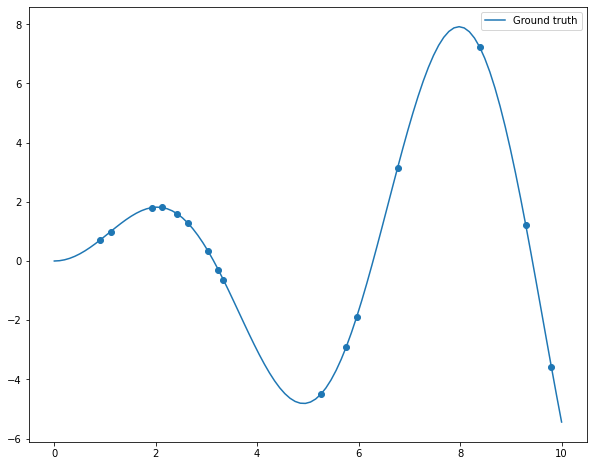

In [2]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 8))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.scatter(X, t)
plt.legend()
plt.show()

**Q:** Apply the `np.polyfit()` function on the data and visualize the result for different degrees of the polynomial (from 1 to 10 or even more). What do you observe? Find a polynomial degree which clearly overfits.

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


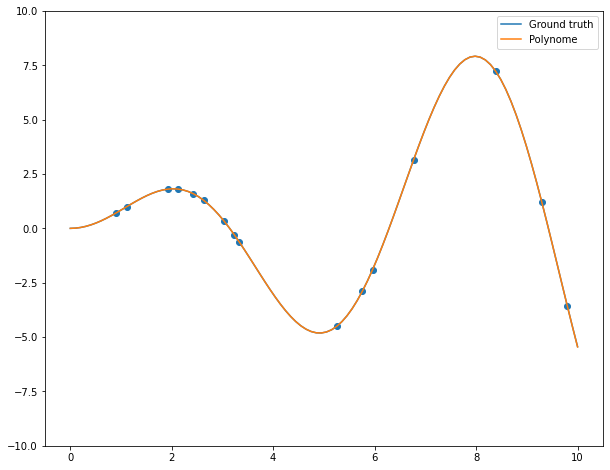

In [3]:
w = np.polyfit(X, t, 20)
y = np.polyval(w, x)

plt.figure(figsize=(10, 8))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.plot(x, y, label="Polynome")
plt.scatter(X, t)
plt.ylim((-10., 10.))
plt.legend()
plt.show()

**Q:** Plot the mean square error on the training set for all polynomial regressions from 1 to 20. How does the training error evolve when the degree of the polynomial is increased? What is the risk by taking the hypothesis with the smallest training error? 

Degree 1 : training error 7.4126671655292835
Degree 2 : training error 7.114742226529839
Degree 3 : training error 6.5190913053139035
Degree 4 : training error 0.5266342658215796
Degree 5 : training error 0.5249012248246177
Degree 6 : training error 0.009917924009005732
Degree 7 : training error 0.00918199773901183
Degree 8 : training error 0.0001023871659993184
Degree 9 : training error 7.017172843011724e-06
Degree 10 : training error 2.8431161049456252e-08
Degree 11 : training error 1.9662402662740677e-10
Degree 12 : training error 3.0551291088708e-12
Degree 13 : training error 6.55262168596695e-17
Degree 14 : training error 1.0041294133517872e-18
Degree 15 : training error 1.5553351352650056e-19
Degree 16 : training error 8.631111297755434e-24
Degree 17 : training error 1.3128408838556928e-24
Degree 18 : training error 2.144066626448902e-24
Degree 19 : training error 2.860522598892999e-24
Degree 20 : training error 1.6978866041738023e-24


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user

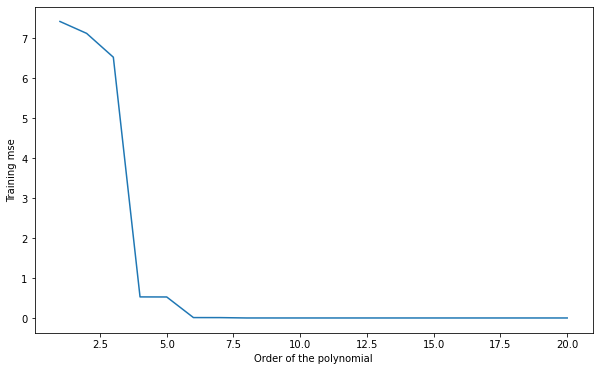

In [8]:
training_mse = []

for deg in range(1, 21):
    
    w = np.polyfit(X, t, deg)
    y = np.polyval(w, X)
    
    mse = np.mean((t-y)**2)
    
    training_mse.append(mse)
    print("Degree", deg, ": training error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), training_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Training mse")
plt.show()

**A:** the more complex the model, the smaller the training error.

## Simple hold-out cross-validation

You will now apply **simple hold-out cross-validation** to find the optimal degree for the polynomial regression. You will need to separate the data set into a training set $S_{\text{train}}$ (70% of the data) and a test set $S_{\text{test}}$ (the remaining 30%). 

The data (X, t) could be easily split into two sets of arrays using slices of indices, as the data is already randomized:

```python
N_train = int(0.7*N)
X_train, t_train = X[:N_train], t[:N_train]
X_test, t_test = X[N_train:], t[N_train:]
```

A much more generic approach is to use the library `scikit-learn` (<https://www.scikit-learn.org>), which provides a method able to split any dataset randomly. 

You can import the method `train_test_split()` from its module:

```python
from sklearn.model_selection import train_test_split
```

The doc of the function is available at: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>.

**Q:** Use scikit-learn to split the data into the corresponding training and test sets. 

**Q:** Train each polynomial from degree 1 to 20 on $S_{\text{train}}$ and plot the generalization error on $S_{\text{test}}$. Which degree of the polynomial gives the minimal empirical error? Why?

**Q:** Run the cross-validation split multiple times. Do you always obtain the same optimal degree? 

Degree 1 : empirical error 2.633170764859142
Degree 2 : empirical error 3.6075190401212325
Degree 3 : empirical error 3.2204464294438226
Degree 4 : empirical error 1.3766376495130221
Degree 5 : empirical error 1.9965181837526706
Degree 6 : empirical error 0.09820517465951335
Degree 7 : empirical error 0.08470956035427771
Degree 8 : empirical error 0.0024226924698089215
Degree 9 : empirical error 0.00015795004329593042
Degree 10 : empirical error 8.604593548063071e-06
Degree 11 : empirical error 7.391716153526405e-07
Degree 12 : empirical error 2.6438111883296253e-06
Degree 13 : empirical error 1.6292130689235224e-05
Degree 14 : empirical error 3.733419198292655e-05
Degree 15 : empirical error 5.682980556537359e-05
Degree 16 : empirical error 6.505054711721444e-05
Degree 17 : empirical error 5.614745204997032e-05
Degree 18 : empirical error 3.237006143573822e-05
Degree 19 : empirical error 6.8052094684265545e-06
Degree 20 : empirical error 4.104060301753484e-06


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user

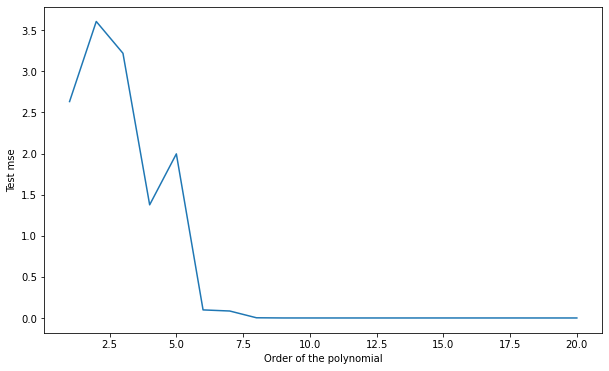

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

test_mse = []

for deg in range(1, 21):
    w = np.polyfit(X_train, t_train, deg)
    y_test = np.polyval(w, X_test)
    
    mse = np.mean((t_test-y_test)**2)
    test_mse.append(mse)
    print("Degree", deg, ": empirical error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), test_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Test mse")
plt.show()

**A:** depending on the split, the optimal degree is either 11, 12, or 13. This is because some samples of the test set might better fit with a given polynomial, depending on how the split was made.  

## k-fold cross-validation

As we only have 16 samples, it is quite annoying to "lose" 5 of them for the test set. Here we can afford to use **k-fold cross-validation**, where the cross-validation split is performed $k$ times:

* The dataset is split into $k$ subsets of equal size (if possible).
* Each subset is iteratively used as the test set, while the $k-1$ other ones are used as a training set.
* The final empirical error is the average of the mse on all subsets.

It would be possible to make the splits using indices too. But it is much easier to use `scikit-learn` once again. You can import the `KFold` class like this:

```python
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, shuffle=True)
```

`n_splits` corresponds to $k$: how many times the dataset is split. Takes $k=4$ for example (4 subsets of 4 samples).

**Q:** Check the doc of `KFold` (<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html>). Print the indices of the examples of the training and test sets for each iteration of the algorithm. Change the value of $k$ to understand how it works.

In [10]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf.split(X, t):
    print(train_index)
    print(test_index)

[ 0  1  2  3  4  5  7  8 11 13 14 15]
[ 6  9 10 12]
[ 0  1  2  4  5  6  7  9 10 11 12 14]
[ 3  8 13 15]
[ 0  1  2  3  6  7  8  9 10 12 13 15]
[ 4  5 11 14]
[ 3  4  5  6  8  9 10 11 12 13 14 15]
[0 1 2 7]


**Q:** Apply k-fold cross-validation on the polynomial regression problem. Which polynomial degree is the best? Run the split multiple times: does the best polynomial degree change?

**Q:** Change $k$ to 16. How stable are the results between two runs?

1 10.449200654815007
2 13.629828737932232
3 15.94310540048036
4 1.9302189209650178
5 4.185049073673414
6 0.05999199906577501
7 1.1527739988762116
8 0.1258131149070061
9 0.15262554069943654
10 0.06303830633085483
11 0.006846766028020763
12 0.007412464970762992
13 0.0001010557570024616
14 0.0006459483900283297
15 0.00024019009164297597
16 7.340108343929356e-05
17 0.0011903276869576502
18 0.0012069252577987257
19 0.001545363544526349
20 0.06502122305606181


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user

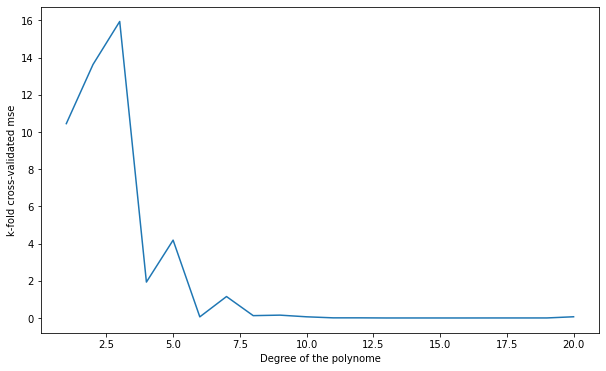

In [17]:
k = 16
kf = KFold(n_splits=k, shuffle=True)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    for deg in range(1, 21):
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg in range(1, 21):
    print(deg, test_mse[deg-1])

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

**A:** a polynomial of order 11 or 12 seems the best. With $k=16$ (one sample in the test set every time), the results are the most stable. It is called **leave-one-out cross-validation** (LOOCV). It is the best cross-validation you can make in terms of bias (you use almost all your data to learn), but it is very expensive (you have to retrain your algorithm for each sample) and the empirical error has a high variance.